In [ ]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 36kB/s 
     |████████████████████████████████| 3.1MB 47.4MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
     |████████████████████████████████| 501kB 57.8MB/s 


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/archive.zip","r")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os
base_dir_path = os.getcwd()
base_dir_path = os.path.join(base_dir_path,'fruits-360')
train_data_dir = os.path.join(base_dir_path,'Training')
validation_data_dir = os.path.join(base_dir_path,'Test')

print("base directory path: ",base_dir_path)
print("Train directory path : ",train_data_dir)
print("Test directory path : ",validation_data_dir)

base directory path:  /content/fruits-360
Train directory path :  /content/fruits-360/Training
Test directory path :  /content/fruits-360/Test


In [ ]:
import tensorflow as tf
print("Tensorflow version: ",tf.__version__)
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

num_classes = 131
img_rows, img_cols = 32, 32
batch_size = 16
 
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size =batch_size,
        class_mode='categorical',
        shuffle=True)
 
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

Tensorflow version:  2.0.0-beta1
Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',input_shape= (img_rows, img_cols, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
print("Model summary: ")
print(model.summary())

Model summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

                     
checkpoint = ModelCheckpoint("/content/my_fruits_model.h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)

earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)


callbacks = [earlystop, checkpoint, reduce_lr]

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

nb_train_samples = 67692
nb_validation_samples = 22688
epochs = 10

history = model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
4229/4230 [============================>.] - ETA: 0s - loss: 2.0571 - accuracy: 0.4098
Epoch 00001: val_loss improved from inf to 0.62610, saving model to /content/my_fruits_model.h5
4230/4230 [==============================] - 356s 84ms/step - loss: 2.0568 - accuracy: 0.4099 - val_loss: 0.6261 - val_accuracy: 0.8135
Epoch 2/10
4229/4230 [============================>.] - ETA: 0s - loss: 0.7128 - accuracy: 0.7617
Epoch 00002: val_loss improved from 0.62610 to 0.37884, saving model to /content/my_fruits_model.h5
4230/4230 [==============================] - 361s 85ms/step - loss: 0.7127 - accuracy: 0.7618 - val_loss: 0.3788 - val_accuracy: 0.8824
Epoch 3/10
4229/4230 [============================>.] - ETA: 0s - loss: 0.5151 - accuracy: 0.8282
Epoch 00003: val_loss did not improve from 0.37884
4230/4230 [==============================] - 349s 83ms/step - loss: 0.5151 - accuracy: 0.8282

In [ ]:
!pip install pyyaml h5py 

In [ ]:
model.save('/content/my_fruits360_model_131classes.h5') 

In [ ]:
def plotResults(historyObject):
    import matplotlib.pyplot as plt
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(train_acc) + 1)
    plt.plot(epochs, train_acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.savefig("accuracy.png")
    plt.figure()
    plt.plot(epochs, loss, 'ro', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.savefig("loss.png")
    plt.show()
    

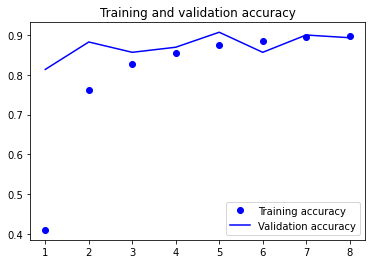

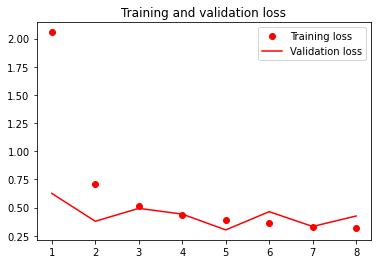

In [ ]:
plotResults(history)